In [58]:
# 📦 Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor


# Load cleaned data
df = pd.read_csv(r"C:\\Users\\Kevin\\Desktop\\Global_health_data\\life-expectancy-prediction\\data\\cleaned\\life_expectancy_cleaned.csv")

# Preview
df.head()



,country_code,country_name,region,sub-region,intermediate-region,year,life_expectancy_women,life_expectancy_men
0,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1960,33.28,31.87
1,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1961,33.81,32.41
2,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1962,34.30,32.88
3,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1963,34.77,33.35
4,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1964,35.25,33.83


In [3]:
# 🛠 Data Preprocessing

# Drop rows with missing values just in case
df_model = df.dropna()

# Encode categorical variables
df_encoded = pd.get_dummies(df_model, columns=["region", "sub-region"], drop_first=True)

# Features to use for prediction
features = ["year"] + [col for col in df_encoded.columns if col.startswith("region_") or col.startswith("sub-region_")]
target = "life_expectancy_women"

X = df_encoded[features]
y = df_encoded[target]

# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
df_model = df.dropna()

# Add non-linear year trend
df_model.loc[:, "year_squared"] = df_model["year"] ** 2

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_model, columns=["region", "sub-region", "country_name"], drop_first=True)

# Define features and target
features = ["year", "year_squared"] + [col for col in df_encoded.columns if col.startswith(("region_", "sub-region_", "country_name_"))]
target = "life_expectancy_women"

X = df_encoded[features]
y = df_encoded[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌳 Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"🌳 R² Score (Women - RF): {r2:.4f}")
print(f"🌿 RMSE (Women - RF): {rmse:.2f}")

C:\Users\Kevin\AppData\Local\Temp\ipykernel_2488\971829664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.loc[:, "year_squared"] = df_model["year"] ** 2


🌳 R² Score (Women - RF): 0.8760
🌿 RMSE (Women - RF): 4.73


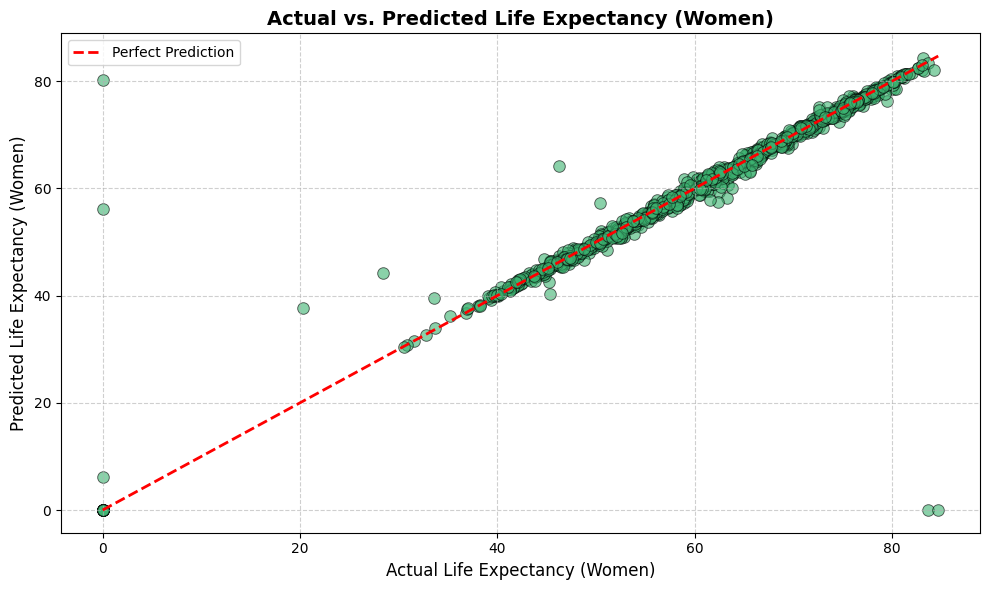

In [62]:
# 📈 Enhanced Visualization: Predicted vs Actual (Women)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="mediumseagreen", edgecolor='black', s=70)

# Reference line for perfect predictions
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label="Perfect Prediction")

# Labels & aesthetics
plt.xlabel("Actual Life Expectancy (Women)", fontsize=12)
plt.ylabel("Predicted Life Expectancy (Women)", fontsize=12)
plt.title("Actual vs. Predicted Life Expectancy (Women)", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [60]:
# 👨‍⚕️ Random Forest Regressor for Men

# Target: Men's life expectancy
target_men = "life_expectancy_men"
y_men = df_encoded[target_men]

# Train/test split
X_train_men, X_test_men, y_train_men, y_test_men = train_test_split(X, y_men, test_size=0.2, random_state=42)

# Train Random Forest
rf_model_men = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
rf_model_men.fit(X_train_men, y_train_men)

# Predict and evaluate
y_pred_men = rf_model_men.predict(X_test_men)
r2_men = r2_score(y_test_men, y_pred_men)
rmse_men = root_mean_squared_error(y_test_men, y_pred_men)

print(f"🌳 R² Score (Men - RF): {r2_men:.4f}")
print(f"🌿 RMSE (Men - RF): {rmse_men:.2f}")


🌳 R² Score (Men - RF): 0.8691
🌿 RMSE (Men - RF): 4.46


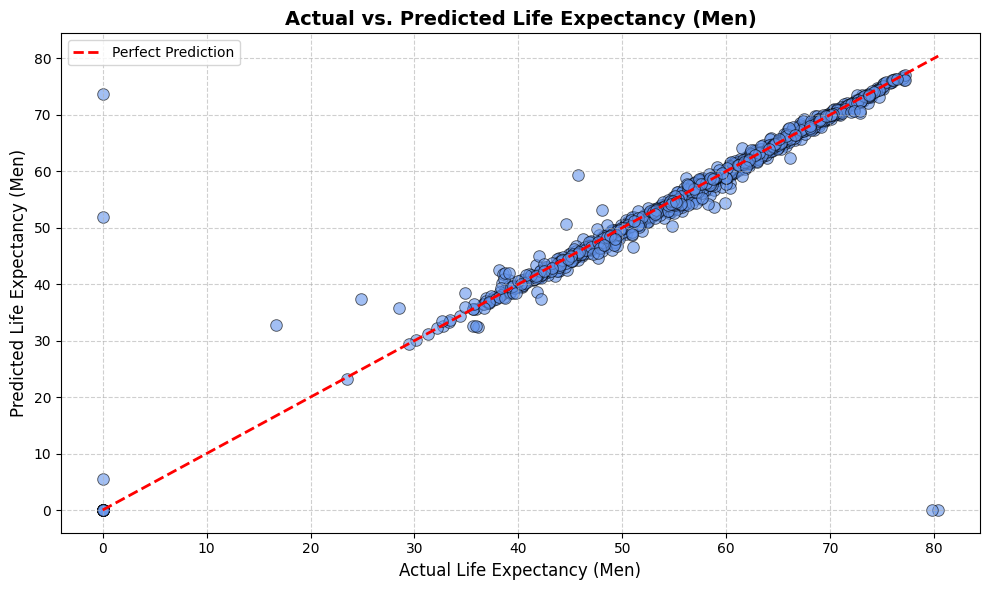

In [63]:
# 📈 Enhanced Visualization: Predicted vs Actual (Men)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_men, y=y_pred_men, alpha=0.6, color="cornflowerblue", edgecolor='black', s=70)

# Reference line for perfect predictions
min_val = min(y_test_men.min(), y_pred_men.min())
max_val = max(y_test_men.max(), y_pred_men.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label="Perfect Prediction")

# Labels & aesthetics
plt.xlabel("Actual Life Expectancy (Men)", fontsize=12)
plt.ylabel("Predicted Life Expectancy (Men)", fontsize=12)
plt.title("Actual vs. Predicted Life Expectancy (Men)", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
